In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In this data-set we have 30 features related to credit cards, most of them are hidden except for time and amount. Apart from features "time" and "amount" we have 28 other features, named from V1 to V28.

Based on these features we have to classify the cases into two parts, the class with genuine transactions (marked with class "0" in the data-set) and the class with fraudlent transactions (marked with class "1" in the data-set).

Modelling here is done using Gaussian Naive Bayes.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Creating a pie_chart for the number of class_0 values and number of class_1 values.

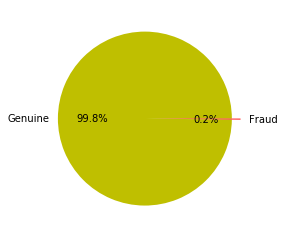

In [3]:
data_frame = pd.read_csv('../input/creditcard.csv')

fig, ax = plt.subplots(1,1)
ax.pie(data_frame.Class.value_counts(),explode=(0,0.1), autopct='%1.1f%%', labels = ['Genuine', 'Fraud'], colors=['y','r'])
plt.axis = 'equal'

From pie-chart, it is observed that the data-set is highly unbalanced, cases with class_0 dominates the data-set. Genuine transaction accounts for 99.8% of the total transactions, while fraudlent transaction accounts only for 0.2%.

If we train our model on this data-set, the results would be highly biased, skewing heavily towards the class having greater count.

The original data_frame is split into two parts data_frame_1 and data_frame_2. data_frame_1 contains cases with class values = 0, and data_frame_2 containes cases with class values = 1. 
Frequency of count_0 in data_frame_1 and count_1 in data_frame_2 is plotted against features V1 to V28. 

In [4]:
data_frame_1 = data_frame[data_frame['Class'] == 0]
data_frame_2 = data_frame[data_frame['Class'] == 1]
print("Cases with genuine transaction >> ", len(data_frame_1))
print("Cases with fraud transaction   >> ", len(data_frame_2)) 

Cases with genuine transaction >>  284315
Cases with fraud transaction   >>  492


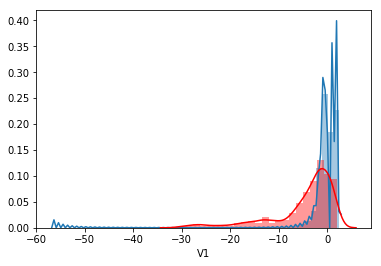

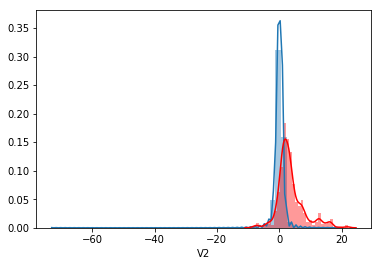

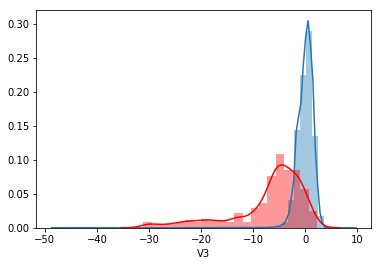

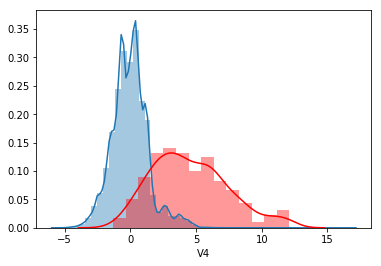

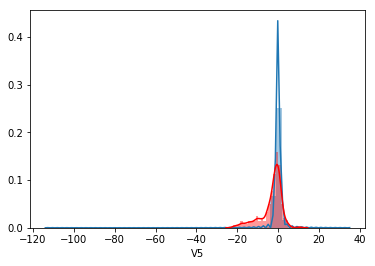

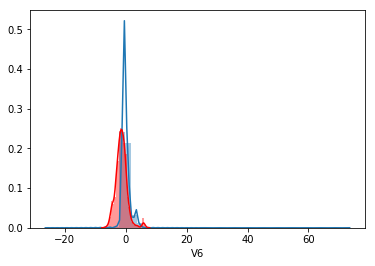

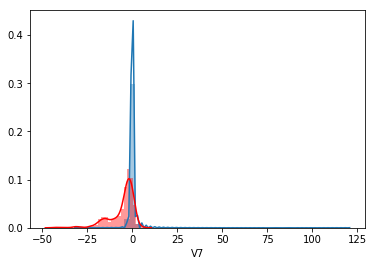

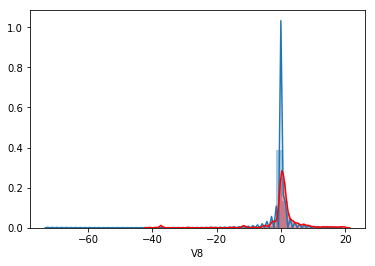

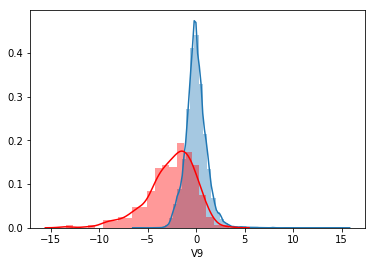

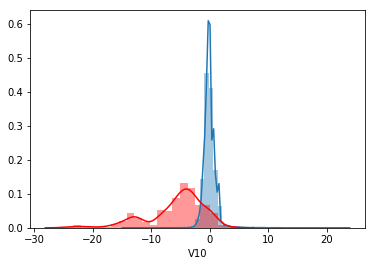

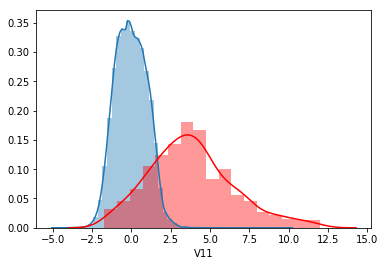

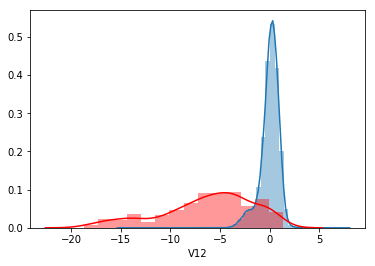

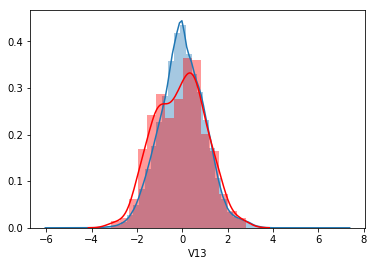

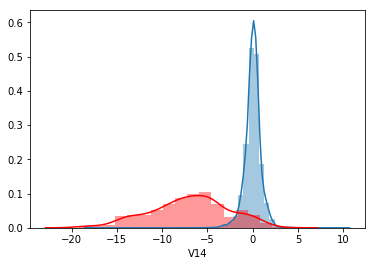

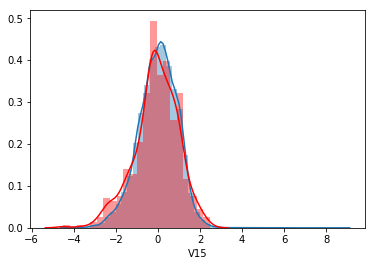

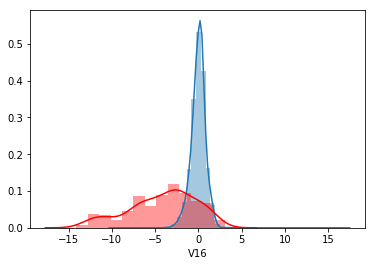

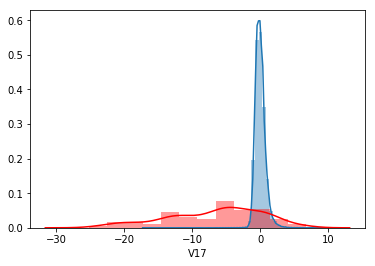

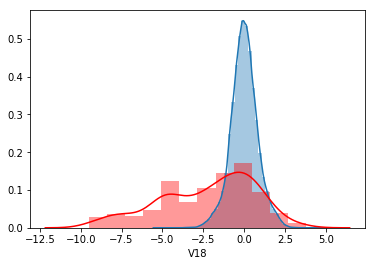

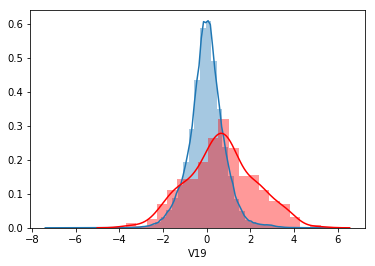

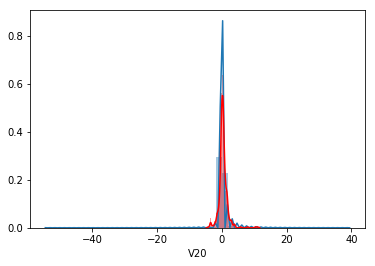

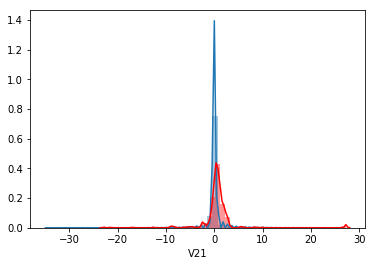

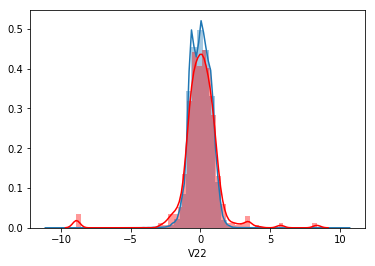

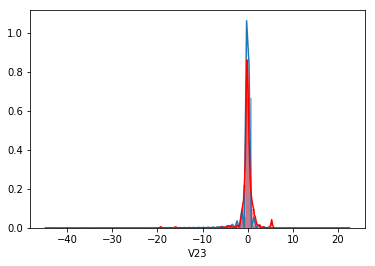

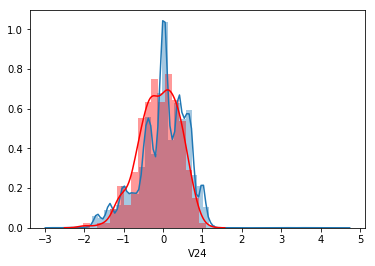

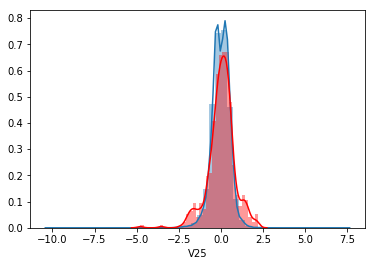

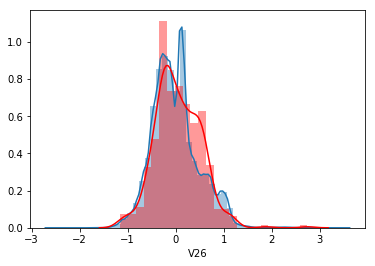

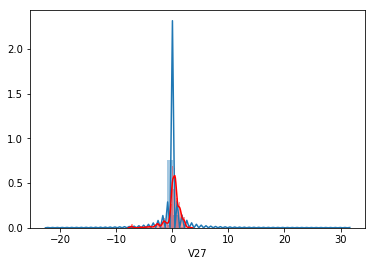

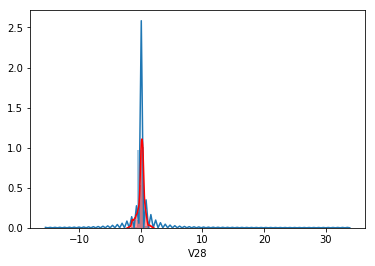

In [5]:
for i in range(1,29):
    sns.distplot(data_frame_1.iloc[:,i])
    sns.distplot(data_frame_2.iloc[:,i], color='r')
    plt.show()

It can be observed that, frequency distribution for both the classes ("0" and "1") against features V8, V13, V15, V20, V21, V22, V23, V24, V25, V26, V27 and V28 are approximately similar. These features would most certainly not help out for the purpose of differentiating between class 0 and 1. So, we drop these features from our data_frames so as to make our model less complex.

In [6]:
data_frame_1 = data_frame_1.drop(columns=["V8","V13","V15","V20","V21","V22","V23","V24","V25","V26","V27","V28"])
data_frame_2 = data_frame_2.drop(columns=["V8","V13","V15","V20","V21","V22","V23","V24","V25","V26","V27","V28"])
print(data_frame_1.head())
print(data_frame_2.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.363787  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971   
1 -0.255425 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805   
2 -1.514654  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969   
3 -1.387024 -0.054952 -0.226487  0.178228 -0.287924 -1.059647 -0.684093   
4  0.817739  0.753074 -0.822843  0.538196 -1.119670 -0.451449 -0.237033   

        V18       V19  Amount  Class  
0  0.025791  0.403993  

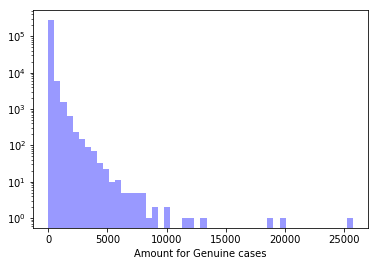

In [7]:
plot = sns.distplot(data_frame_1["Amount"],color='b', kde=False )
plot.set_yscale('log')
plt.xlabel("Amount for Genuine cases")
plt.show()

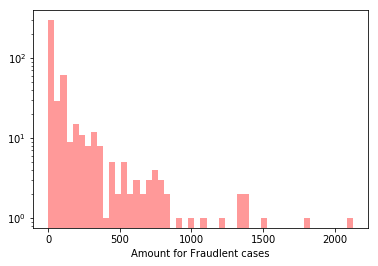

In [8]:
plot = sns.distplot(data_frame_2["Amount"],color='r', kde=False )
plot.set_yscale('log')
plt.xlabel("Amount for Fraudlent cases")
plt.show()

As the data-set is highly unbalanced, dominated with the class values of 0, it is required to oversample the minority class in the training data-set. This oversampling is done with the help SMOTE algorithm. 

But before oversampling the minority class in the training data-set, we segregate a test data-set, which contains 50 cases of class 1 and 2000 cases of class 0. This data-set would be used to measure various performance parameters for Naive Bayes Classification model.

(Note: The training data-set doesn't contain any of the entries from test data-set).

In [9]:
data_frame_final_test_1 = data_frame_2.head(50)
data_frame_final_test_0 = data_frame_1.head(2500)
print("Fraud cases in final test-set",len(data_frame_final_test_1))
print("Genuine cases in final test-set", len(data_frame_final_test_0))


Fraud cases in final test-set 50
Genuine cases in final test-set 2500


In [10]:
data_frame_train_class_1 = data_frame_2.tail(len(data_frame_2)-50)
data_frame_train_class_0 = data_frame_1.tail(len(data_frame_1)-2500)
print("Fraud cases in training data-set", len(data_frame_train_class_1))
print("Genine cases in training data-set",len(data_frame_train_class_0))

Fraud cases in training data-set 442
Genine cases in training data-set 281815


In [11]:
training_data_frame = pd.concat([data_frame_train_class_1, data_frame_train_class_0])
testing_data_frame = pd.concat([data_frame_final_test_1, data_frame_final_test_0])

data_x_test = testing_data_frame.drop(columns=['Class'])
test_x = data_x_test.values
test_y = testing_data_frame['Class'].values

data_x = training_data_frame.drop(columns=['Class'])
x = data_x.values
y = training_data_frame['Class'].values
count_0 = 0
count_1 = 0
for i in range(len(y)):
    if y[i] == 0:
        count_0 = count_0 + 1
    else:
        count_1 = count_1 + 1
print('count_0 in training data-set', count_0)
print('count_1 in training data-set', count_1)

count_0 in training data-set 281815
count_1 in training data-set 442


After segregating a training and testing data-set, the minority class in training data-set is oversampled using  kMeansSMOTE.

In [12]:
from kmeans_smote import KMeansSMOTE
sm = KMeansSMOTE(imbalance_ratio_threshold=float('Inf'), kmeans_args={'n_clusters':1})
x_res, y_res = sm.fit_resample(x, y)
count_0 = 0
count_1 = 0
for i in range(len(y_res)):
    if y_res[i] == 0:
        count_0 = count_0 + 1
    else:
        count_1 = count_1 + 1
print('count_0 in training data-set after SMOTE', count_0)
print('count_1 in training data-set after SMOTE', count_1)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

count_0 in training data-set after SMOTE 281815
count_1 in training data-set after SMOTE 281815


Naive-Bayes classification model.

In [13]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_res, y_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred = GNB.predict(test_x)
y_true = test_y
y_pred_prob = GNB.predict_proba(test_x)
print("Predictions for the test-set")
print(y_pred)
print("True values for the test-set")
print(y_true)
print("\n")
print("Prediction probability for the test-set")
print(y_pred_prob)


Predictions for the test-set
[1 0 1 ... 0 0 0]
True values for the test-set
[1 1 1 ... 0 0 0]


Prediction probability for the test-set
[[3.75410094e-01 6.24589906e-01]
 [9.99999981e-01 1.88664672e-08]
 [3.23237895e-01 6.76762105e-01]
 ...
 [9.99999894e-01 1.05797192e-07]
 [9.99999998e-01 1.59853059e-09]
 [9.99999999e-01 1.12246126e-09]]


In [15]:
from sklearn.metrics import confusion_matrix
confusion_1 = confusion_matrix(y_true, y_pred)
print("Confusion Matrix for Gaussian NB")
print("")
print(confusion_1)

Confusion Matrix for Gaussian NB

[[2494    6]
 [   4   46]]


Confusion matrix for the test-data-set showS that out of 50 fraud cases 46 were truly predicted.  

In [16]:
from sklearn.metrics import roc_auc_score,f1_score,precision_score, accuracy_score, recall_score
roc_auc_score_1 = roc_auc_score(y_true, y_pred)
accuracy_score_1 = accuracy_score(y_true, y_pred)
precision_score_1 = precision_score(y_true, y_pred)
recall_score_1 = recall_score(y_true, y_pred)
f1_score_1 = f1_score(y_true, y_pred)

print("roc_auc_score", "%.3f" %roc_auc_score_1)
print("accuracy_score", "%.3f" %accuracy_score_1)
print("precision_score", "%.3f" %precision_score_1)
print("recall_score", "%.3f" %recall_score_1)
print("f1_score", "%.3f" %f1_score_1)


roc_auc_score 0.959
accuracy_score 0.996
precision_score 0.885
recall_score 0.920
f1_score 0.902
